## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\hp\Olist_Project\02 Data\Prepared Data'

In [4]:
# Import the dataset

df = pd.read_csv(os.path.join(path, 'merged_all.csv'))

In [5]:
df.columns

Index(['Unnamed: 0', 'customer_id', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_score',
       'review_creation_date', 'review_answer_timestamp',
       'product_name_length', 'product_description_length',
       'product_photos_qty', 'product_weight_grms', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state',
       'product_category_name_english'],
      dtype='object')

In [6]:
# Drop duplicate column from df_order_payments
df = df.drop('Unnamed: 0', axis=1)


In [56]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,product_category_name_english,order_purchase_hour,order_purchase_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,8577,itaquaquecetuba,SP,-20.509897,-47.397865,franca,SP,office_furniture,15,5
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,8577,itaquaquecetuba,SP,-20.497396,-47.399242,franca,SP,office_furniture,15,5
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,8577,itaquaquecetuba,SP,-20.510458,-47.399550,franca,SP,office_furniture,15,5
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,8577,itaquaquecetuba,SP,-20.480940,-47.394160,franca,SP,office_furniture,15,5
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,8577,itaquaquecetuba,SP,-20.515413,-47.398193,franca,SP,office_furniture,15,5


In [7]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'product_name_length',
       'product_description_length', 'product_photos_qty',
       'product_weight_grms', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state',
       'product_category_name_english'],
      dtype='object')

In [8]:
# Convert to datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_purchase_hour'] = df['order_purchase_timestamp'].dt.hour
df['order_purchase_month'] = df['order_purchase_timestamp'].dt.month


In [9]:
df_numeric = df[['price', 'order_item_id',
                 'payment_sequential', 'payment_installments',
                 'payment_value', 'review_score',
                 'product_photos_qty', 'order_purchase_month',
                 'order_purchase_hour',
                ]]

In [10]:
df_numeric.head()

,price,order_item_id,payment_sequential,payment_installments,payment_value,review_score,product_photos_qty,order_purchase_month,order_purchase_hour
0,124.99,1,1,2,146.87,4,1,5,15
1,124.99,1,1,2,146.87,4,1,5,15
2,124.99,1,1,2,146.87,4,1,5,15
3,124.99,1,1,2,146.87,4,1,5,15
4,124.99,1,1,2,146.87,4,1,5,15


In [11]:
# Exporting the cleaned data
df_numeric.to_csv(os.path.join(path, 'subset_ML.csv'))

### 2. The elbow technique

In [13]:
# creating subset
dev_df = df_numeric.sample(frac=0.01, random_state=4)

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
score = [kmeans[i].fit(dev_df).score(dev_df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-11765292165.230244,
 -6102659619.708004,
 -4118061671.659044,
 -3084903730.2030606,
 -2394691883.604428,
 -2059318844.9578974,
 -1754819295.6139247,
 -1486391704.76268,
 -1270806375.083804]

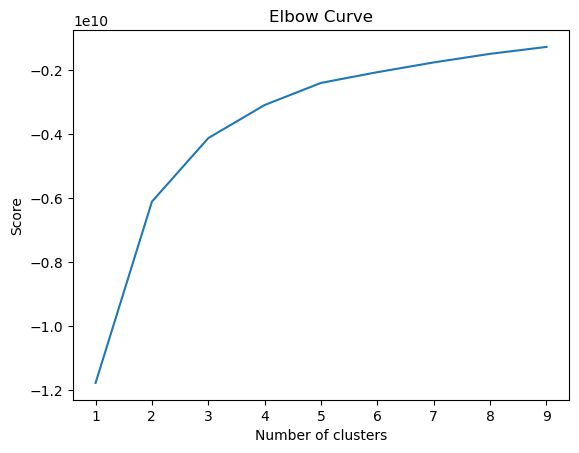

In [16]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl, score)
pl.xlabel('Number of clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()


#####  In this example, there's a large jump from two to three on the x-axis, but after that, the curve slightly straightens out. This means that the 
##### optimal count for our clusters is five.

### 3. k-means clustering

In [19]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 


In [20]:
# Fit the k-means object to the data.

kmeans.fit(dev_df)

KMeans(n_clusters=5)

In [21]:
dev_df['clusters'] = kmeans.fit_predict(dev_df)

In [22]:
dev_df.head()

,price,order_item_id,payment_sequential,payment_installments,payment_value,review_score,product_photos_qty,order_purchase_month,order_purchase_hour,clusters
6429830,99.00,1,1,1,116.94,5,3,2,21,0
8986244,89.00,1,1,2,106.87,3,3,1,16,0
6820476,699.99,1,1,4,798.19,5,2,8,17,1
10928743,49.00,1,1,1,66.67,5,2,11,0,0
740612,269.90,1,1,3,282.41,5,1,4,2,2


In [23]:
dev_df['clusters'].value_counts()

clusters
0    88794
2    24612
1     4227
3      770
4       52
Name: count, dtype: int64

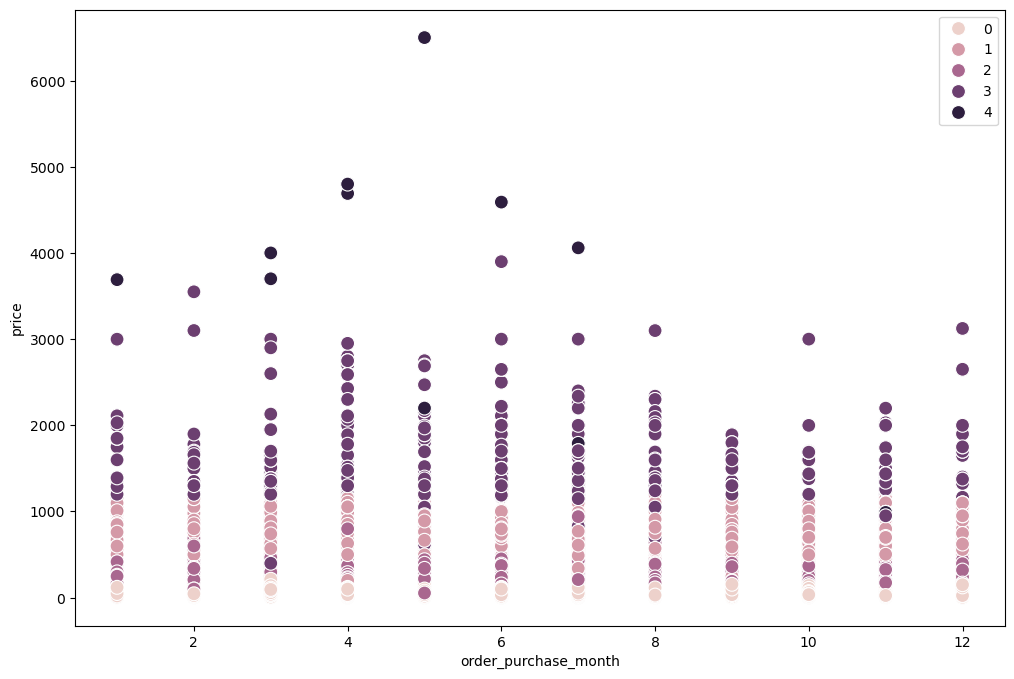

In [24]:
# Plot the clusters for the "price" and "order_purchase_month" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=dev_df['order_purchase_month'], y=dev_df['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('order_purchase_month') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

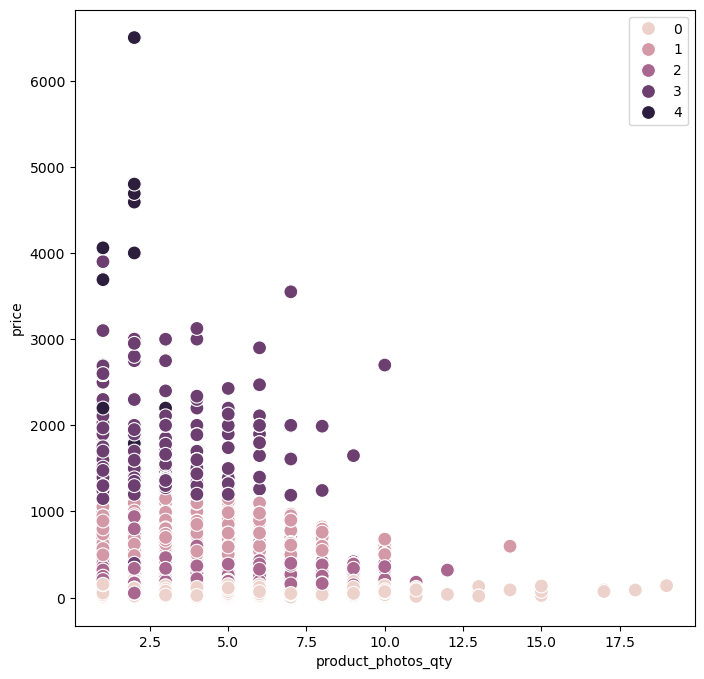

In [25]:
# Plot the clusters for the "review_score" and "payment_installments" variables.

plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=dev_df['product_photos_qty'], y=dev_df['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('product_photos_qty') 
plt.ylabel('price') 
plt.show()


In [26]:
dev_df.loc[dev_df['clusters'] == 4, 'cluster'] = 'black'
dev_df.loc[dev_df['clusters'] == 3, 'cluster'] = 'dark purple'
dev_df.loc[dev_df['clusters'] == 2, 'cluster'] = 'purple'
dev_df.loc[dev_df['clusters'] == 1, 'cluster'] = 'pink'
dev_df.loc[dev_df['clusters'] == 0, 'cluster'] = 'ivory'

In [27]:
dev_df.groupby('clusters').agg({'price':['mean', 'median'], 
                         'product_photos_qty':['mean', 'median'], 
                         'order_item_id':['mean', 'median'],
                          'order_purchase_month':['mean', 'median']})

price          product_photos_qty        order_item_id         \
                 mean   median               mean median          mean median   
clusters                                                                        
0           65.485758    57.89           2.204867    1.0      1.139672    1.0   
1          528.677904   546.90           2.392477    2.0      1.722971    1.0   
2          200.464566   187.90           2.135584    1.0      1.331383    1.0   
3         1456.135234  1380.00           2.516883    2.0      1.435065    1.0   
4         2057.980769   989.10           1.365385    1.0      2.826923    2.0   

         order_purchase_month         
                         mean median  
clusters                              
0                    6.021893    6.0  
1                    6.390348    6.0  
2                    5.915041    6.0  
3                    6.148052    6.0  
4                    8.538462   11.0

#### Cluster 3 has the highest price of the purchased product in the month of November as per the median with just 2 product photo
#### this cluster can be further analysed. 

In [29]:
# Exporting the cleaned data
dev_df.to_csv(os.path.join(path, 'with_clusters.csv'))